In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!mkdir data
!wget -O data/oil_test.csv 'https://raw.githubusercontent.com/digvijaysingh3023/images/main/oil_test.csv'
!wget -O data/train_oil.csv 'https://raw.githubusercontent.com/digvijaysingh3023/images/main/train_oil.csv'

--2024-04-25 12:28:55--  https://raw.githubusercontent.com/digvijaysingh3023/images/main/oil_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25565 (25K) [text/plain]
Saving to: ‘data/oil_test.csv’

data/oil_test.csv   100%[===================>]  24.97K  --.-KB/s    in 0.001s  

2024-04-25 12:28:55 (29.6 MB/s) - ‘data/oil_test.csv’ saved [25565/25565]

--2024-04-25 12:28:55--  https://raw.githubusercontent.com/digvijaysingh3023/images/main/train_oil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61186 (60K) [text/plai

In [ ]:
train=pd.read_csv("./data/train_oil.csv")

In [ ]:
t=pd.read_csv("./data/train_oil.csv")
y_train=t["Onshore/Offshore"]

In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,3,2,5,1870,2,7,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,3,6,15,4843,14,7,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,3,8,5,6050,9,5,250.0,184.0,21.0,410.0
3,61.3833,1.7500,3,6,16,8988,9,7,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,3,12,5,9306,6,3,233.0,167.0,11.8,1407.0


In [ ]:
test=pd.read_csv("./data/oil_test.csv")
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [ ]:
train.shape

(309, 20)

In [ ]:
test.shape

(133, 19)

In [ ]:
train.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Onshore/Offshore', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
test.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Depth',
       'Reservoir period', 'Lithology', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

In [ ]:
test.isna().sum()

Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name                         8
Tectonic regime                    0
Latitude                          13
Longitude                         16
Operator company                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='Latitude', ylabel='Density'>

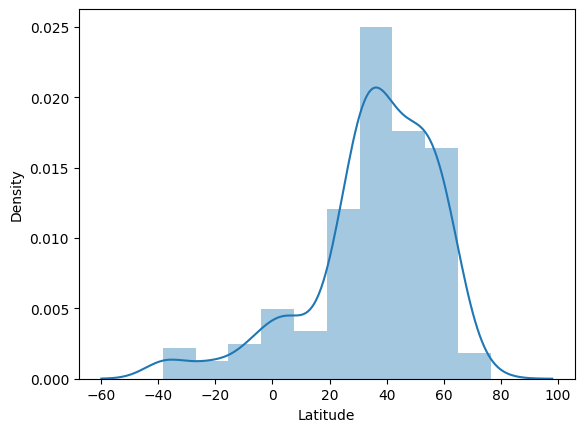

In [ ]:
sns.distplot(train['Latitude'], bins=10)


we have left-skwed in latitude lets fill this first


In [ ]:
train.describe()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,282.00000,279.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,35.62426,-12.508435,6755.669903,760.087379,183.683236,17.825178,476.994757
std,22.19116,86.387220,3628.094135,1353.934404,282.252489,7.171048,1000.140605
min,-38.39890,-151.615300,220.000000,11.000000,2.120000,1.100000,0.010000
25%,28.24915,-102.336500,4059.000000,128.000000,45.000000,12.000000,10.000000
50%,38.13500,1.810000,6500.000000,312.000000,110.000000,17.000000,68.000000
75%,52.13360,56.179900,9186.000000,715.000000,205.000000,23.600000,390.000000
max,76.44620,148.417000,19888.000000,8200.000000,2976.000000,35.000000,7500.000000


we can see most of the latitude is between 28to52 in 1st and 3rd quartile

In [ ]:
#lets put the mean value in null spaces of latitude
mean_value=train["Latitude"].mean()
train["Latitude"].fillna(value=mean_value, inplace=True)


In [ ]:
mean_value=test["Latitude"].mean()
test["Latitude"].fillna(value=mean_value, inplace=True)

<Axes: xlabel='Longitude', ylabel='Density'>

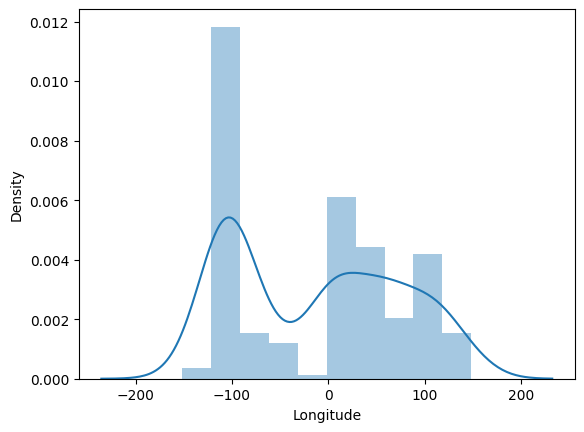

In [ ]:
#lets see longitude too
sns.distplot(train['Longitude'], bins=10)


In [ ]:
train["Longitude"].mean()
#by seeing graph we can see that graph is not oriented towards mean lets try another things
#we can see max no are between -102to56 so we will fill null values no between them i.e i will fillin 30

-12.508434587813621

In [ ]:
train["Longitude"].fillna(value=-30, inplace=True)


In [ ]:
test["Longitude"].fillna(value=-30, inplace=True)


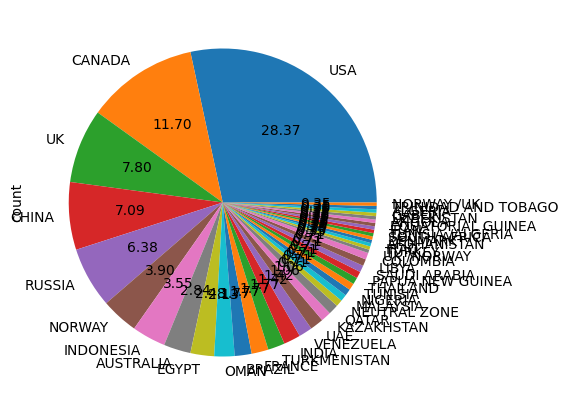

In [ ]:
#lets fill country null values now
plt.figure(figsize=(8,5))

train['Country'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [ ]:
#we can see most occuring countrys are usa,canada,uk
#so we will fill this by USA
train["Country"].fillna(value="USA", inplace=True)


In [ ]:
test["Country"].fillna(value="USA", inplace=True)


In [ ]:
train["Region"].mode()

0    NORTH AMERICA
Name: Region, dtype: object

In [ ]:
#so most occurin in this north america we will it by this only
train["Region"].fillna(value="NORTH AMERICA", inplace=True)


In [ ]:
test["Region"].mode()
test["Region"].fillna(value="NORTH AMERICA", inplace=True)


<Axes: xlabel='Basin name', ylabel='count'>

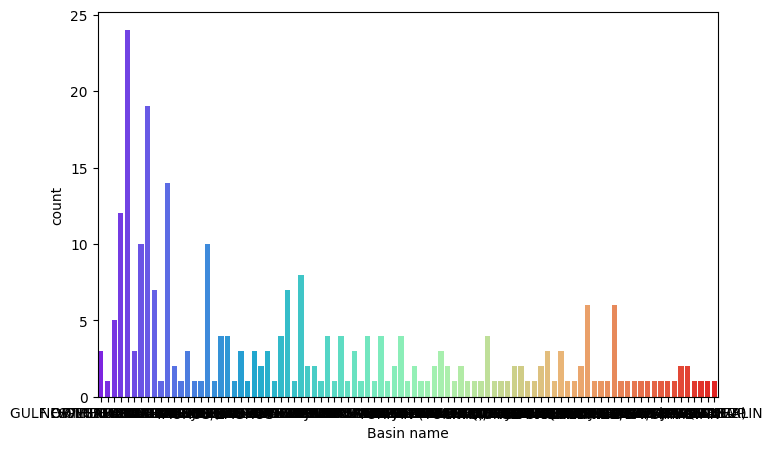

In [ ]:
#train["Basin name"]
plt.figure(figsize=(8,5))

sns.countplot(x='Basin name',data=train, palette='rainbow')


In [ ]:
train["Basin name"].mode()


0    WESTERN CANADA
Name: Basin name, dtype: object

In [ ]:
train["Basin name"].fillna(value="WESTERN CANADA", inplace=True)


In [ ]:
test["Basin name"].fillna(value="WESTERN CANADA", inplace=True)


In [ ]:
test.isna().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [ ]:
train.isna().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

<Axes: xlabel='Country', ylabel='count'>

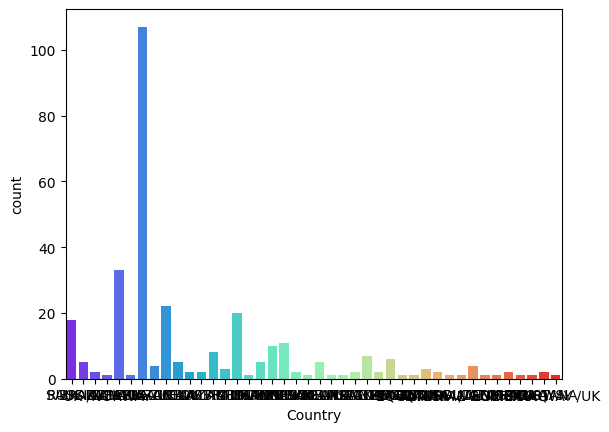

In [ ]:
#so we have fill all the missing values Now lets visualize our data with output
sns.countplot(x='Country',data=train, palette='rainbow')


<Axes: xlabel='Country', ylabel='Longitude'>

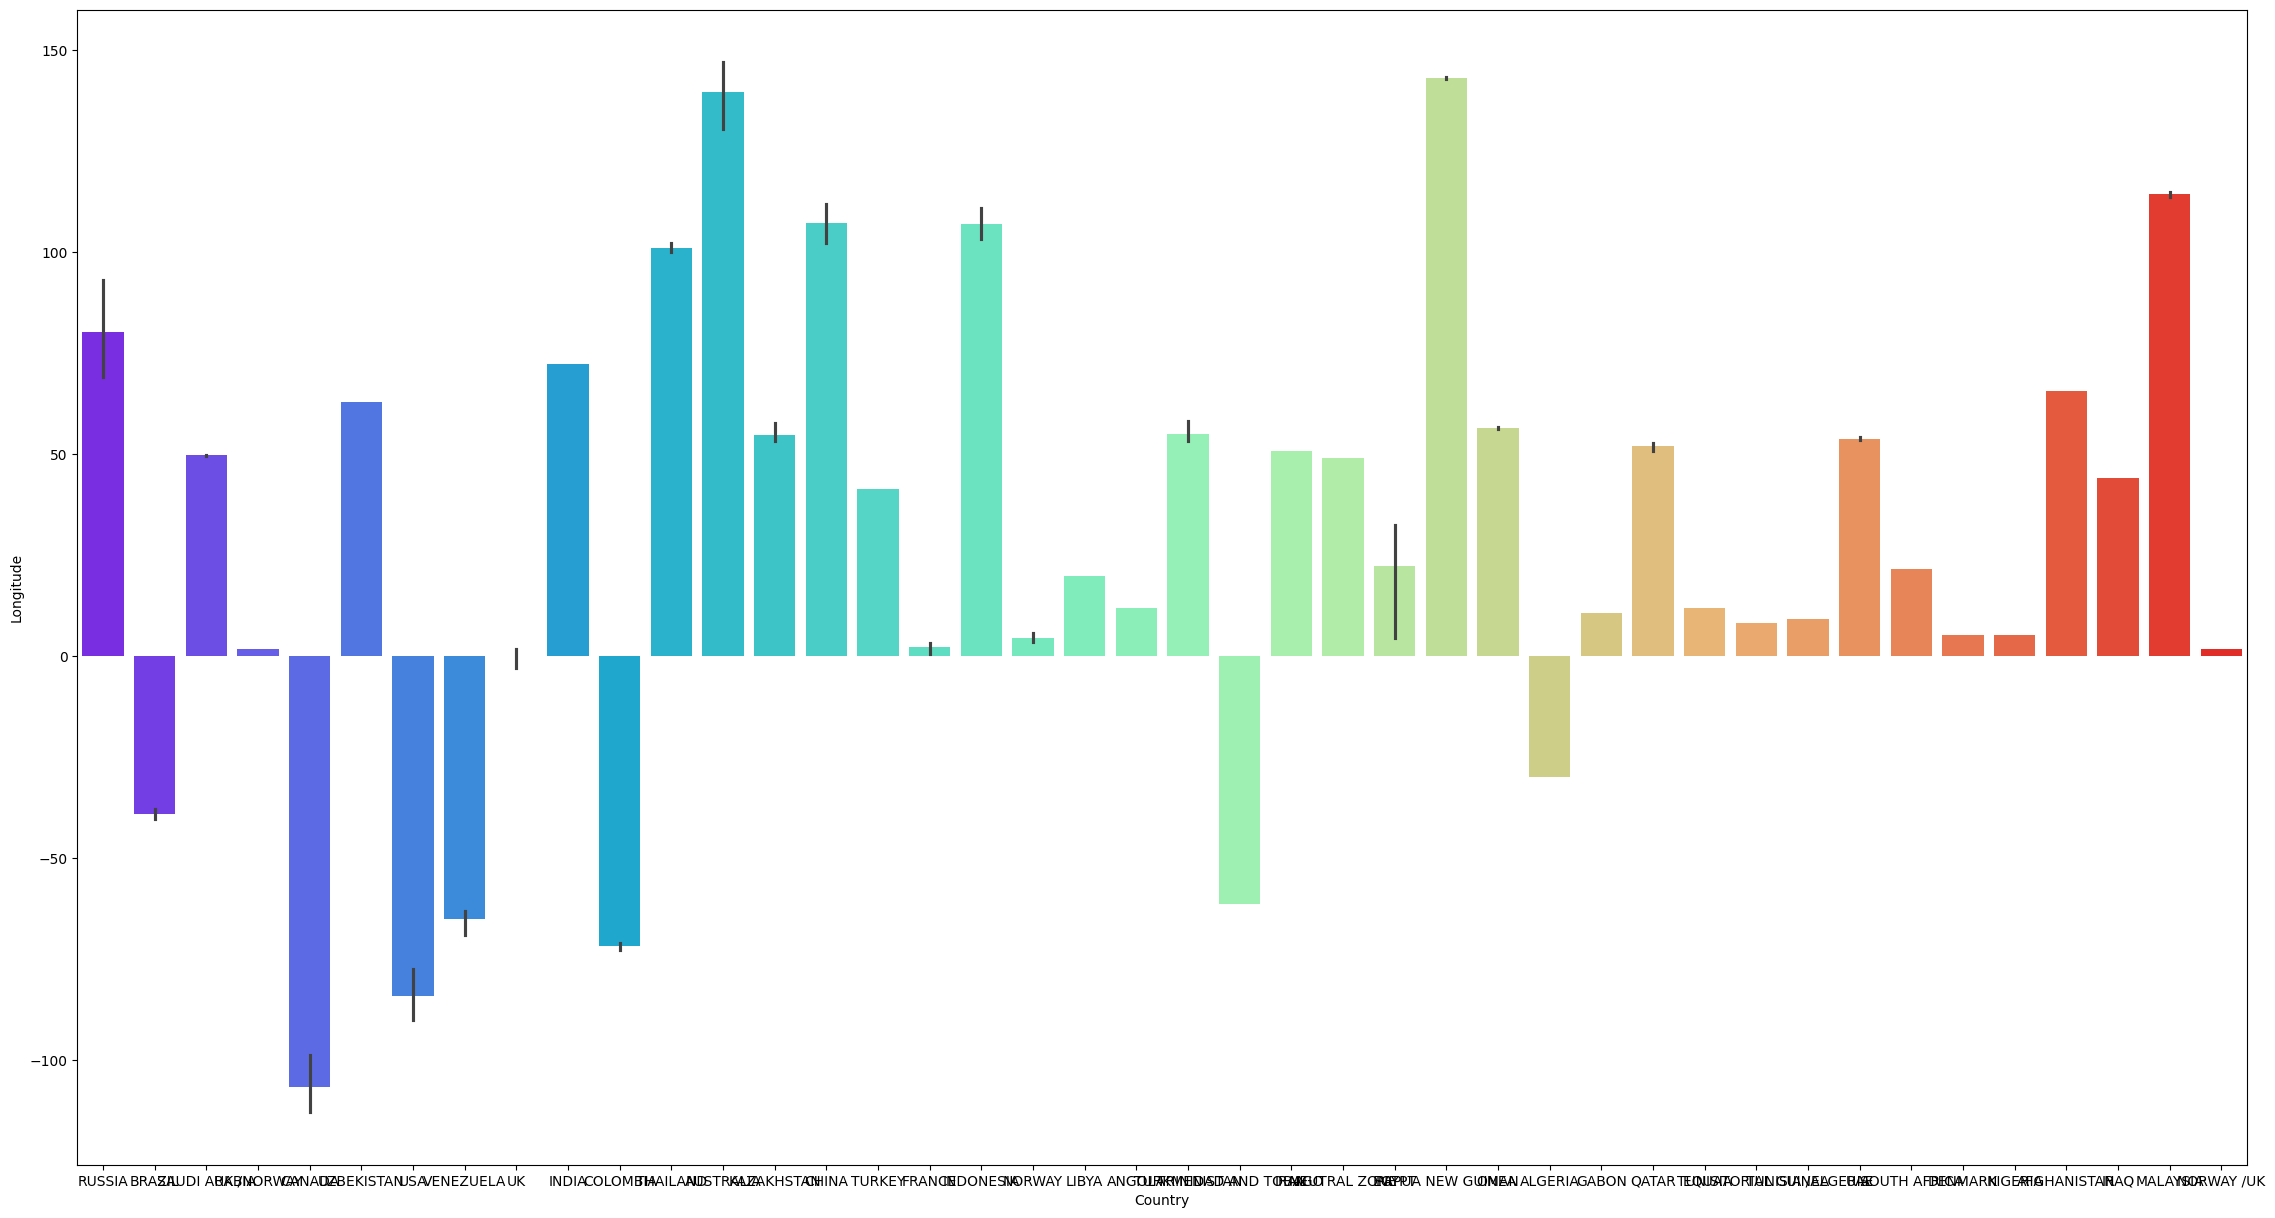

In [ ]:
plt.figure(figsize=(28,15))

sns.barplot(x='Country',y='Longitude',data=train, palette='rainbow')
#plt.figure(figsize=(8,5))


In [ ]:
train.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Onshore/Offshore', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

<Axes: ylabel='count'>

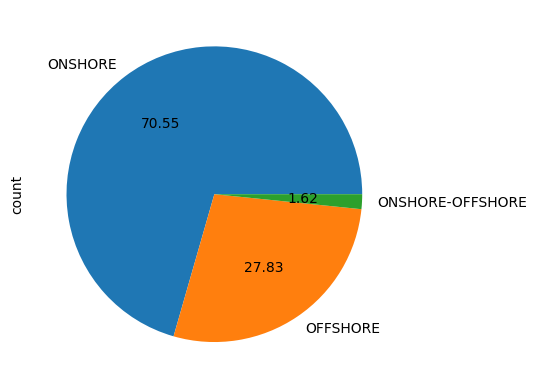

In [ ]:
train['Onshore/Offshore'].value_counts().plot(kind='pie', autopct='%.2f')


In [ ]:
#so our data is little bit imbalance we will the onshore_ofshore with offshore
y_train=y_train.replace("ONSHORE-OFFSHORE","OFFSHORE",regex=True)



<Axes: ylabel='count'>

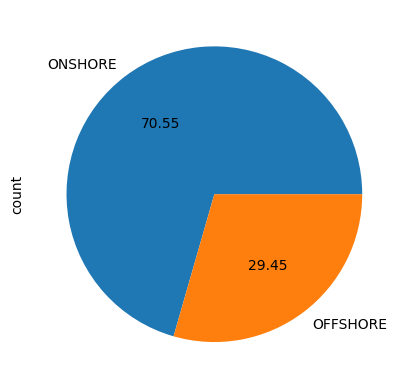

In [ ]:
y_train.value_counts().plot(kind='pie', autopct='%.2f')


In [ ]:
#now lets change the catagorical data into numerical data
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
def drop_col(df):
    df=df.drop(["Field name","Reservoir unit","Country","Region","Basin name","Operator company","Tectonic regime"],axis=1,inplace=True)
    return df

In [ ]:
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [ ]:
drop_col(train)

In [ ]:
drop_col(test)

In [ ]:
#=train["Onshore/Offshore"]
y_train.head()

0     ONSHORE
1     ONSHORE
2     ONSHORE
3    OFFSHORE
4     ONSHORE
Name: Onshore/Offshore, dtype: object

In [ ]:
#now drop output too
train.drop("Onshore/Offshore",axis=1,inplace=True)

In [ ]:
train.columns

Index(['Latitude', 'Longitude', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
test.columns

Index(['Latitude', 'Longitude', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
#we left with 5 clumns as catogorical data lets start with y_train
y_train.replace(['OFFSHORE', 'ONSHORE','ONSHORE-OFFSHORE'],
                        [0, 1,2], inplace=True)

In [ ]:
y_train

0      1
1      1
2      1
3      0
4      1
      ..
304    1
305    1
306    1
307    1
308    1
Name: Onshore/Offshore, Length: 309, dtype: int64

In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


<Axes: ylabel='count'>

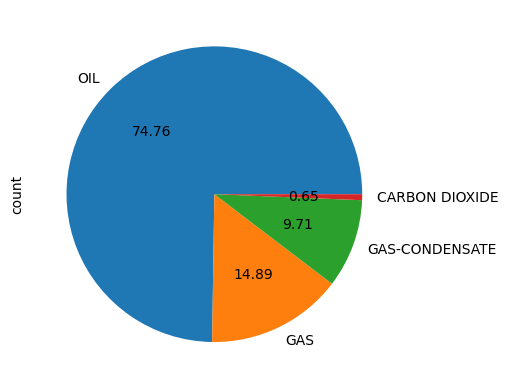

In [ ]:
train['Hydrocarbon type'].value_counts().plot(kind='pie', autopct='%.2f')


since these are only 4 types we will have choice of one hot and label encoding



<Axes: ylabel='count'>

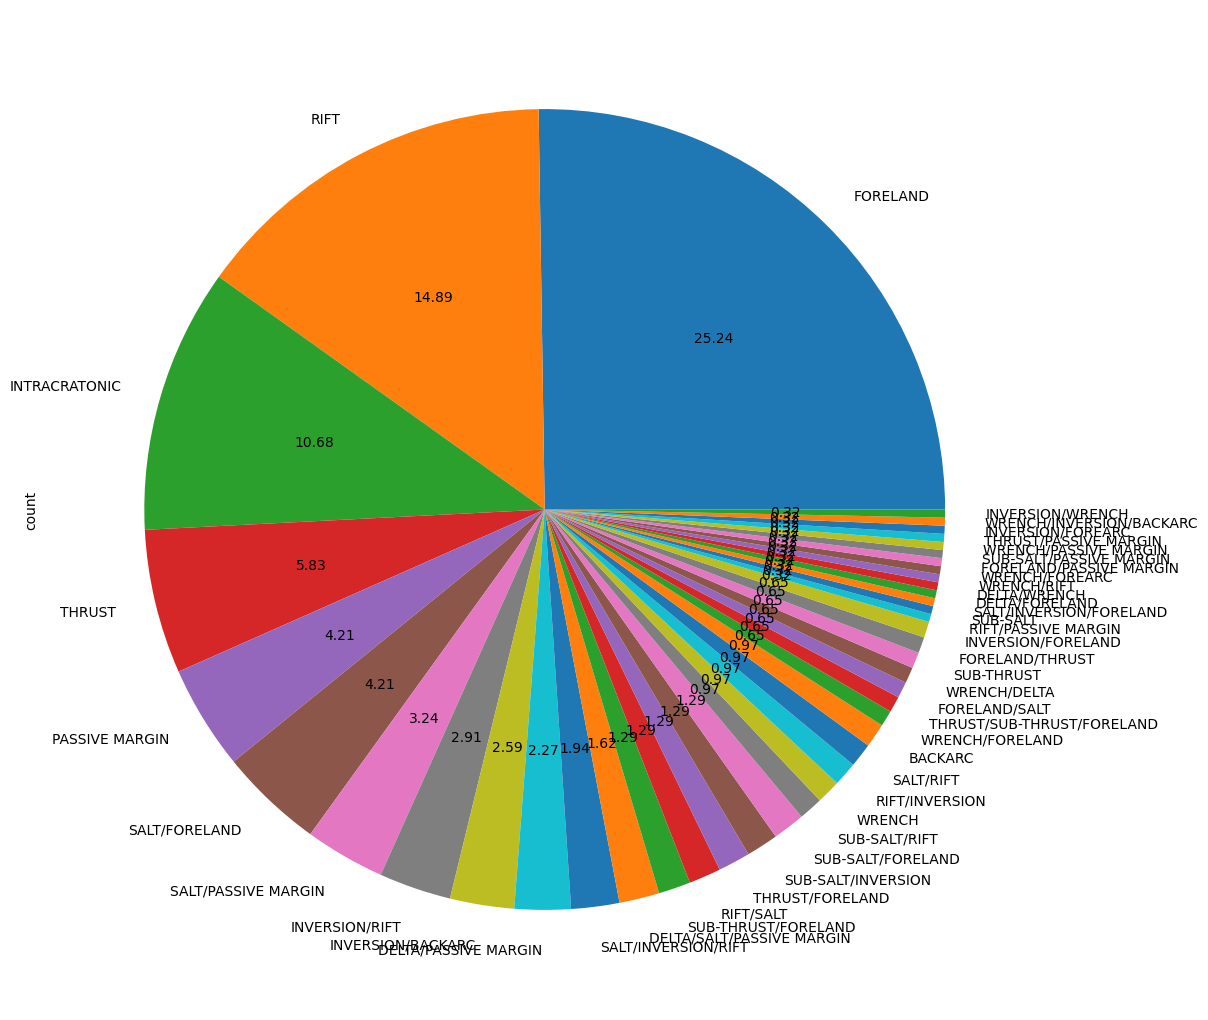

In [ ]:
train['Structural setting'].value_counts().plot(kind='pie', autopct='%.2f',figsize=(13,13))


Since these are manny types of cat types we cant think of to do one hot encoding

In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


<Axes: ylabel='count'>

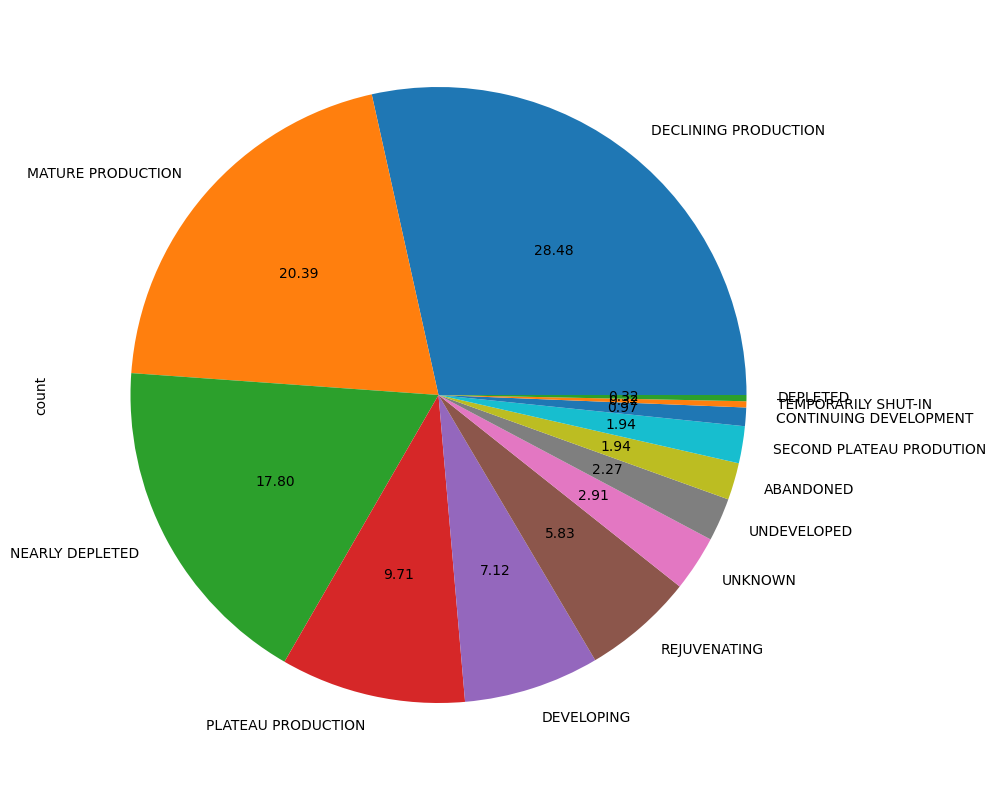

In [ ]:
train['Reservoir status'].value_counts().plot(kind='pie', autopct='%.2f',figsize=(10,10))


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
cols = ['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Reservoir period','Lithology'] # # Encode labels of multiple columns at once #
train[cols] = train[cols].apply(LabelEncoder().fit_transform) # # Print head # df.head()


In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,3,2,5,1870,2,7,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,3,6,15,4843,14,7,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,3,8,5,6050,9,5,250.0,184.0,21.0,410.0
3,61.3833,1.7500,3,6,16,8988,9,7,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,3,12,5,9306,6,3,233.0,167.0,11.8,1407.0


In [ ]:
cols = ['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Reservoir period','Lithology'] # # Encode labels of multiple columns at once #
test[cols] = test[cols].apply(LabelEncoder().fit_transform) # # Print head # df.head()

In [ ]:
test.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,29.7422,28.4925,2,3,18,10282,5,11,745.0,144.0,10.0,8.0
1,31.4382,31.3616,1,1,33,10499,9,11,509.0,410.0,20.0,300.0
2,48.4740,57.6667,4,2,24,6000,2,9,300.0,105.0,10.0,20.0
3,60.7833,1.7333,4,4,18,9790,8,11,886.0,344.0,17.0,500.0
4,21.6000,72.9167,4,3,36,2950,11,11,670.0,0.0,21.0,250.0


In [ ]:
# make a copy of dataframe
df = train.copy()
df.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,3,2,5,1870,2,7,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,3,6,15,4843,14,7,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,3,8,5,6050,9,5,250.0,184.0,21.0,410.0
3,61.3833,1.7500,3,6,16,8988,9,7,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,3,12,5,9306,6,3,233.0,167.0,11.8,1407.0


In [ ]:
df_test= test.copy()
df_test.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,29.7422,28.4925,2,3,18,10282,5,11,745.0,144.0,10.0,8.0
1,31.4382,31.3616,1,1,33,10499,9,11,509.0,410.0,20.0,300.0
2,48.4740,57.6667,4,2,24,6000,2,9,300.0,105.0,10.0,20.0
3,60.7833,1.7333,4,4,18,9790,8,11,886.0,344.0,17.0,500.0
4,21.6000,72.9167,4,3,36,2950,11,11,670.0,0.0,21.0,250.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cat_col = ['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Reservoir period','Lithology']
num_col = list(df.drop([*cat_col], axis = 1).columns)
col_transf = ColumnTransformer([
                                ('num_scaling1', StandardScaler(), num_col),
])

In [ ]:
df=col_transf.fit_transform(df)
#scaled_features = pd.DataFrame(features, columns = col_names)


In [ ]:
df_test=col_transf.fit_transform(df_test)


In [ ]:
df_test = pd.DataFrame(df_test, columns = num_col)
df_test.head()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,-0.286676,0.390083,1.169945,-0.059150,-0.204431,-0.976561,-0.422213
1,-0.200188,0.423220,1.233442,-0.204026,0.740327,0.218245,-0.145459
2,0.668553,0.727033,-0.083020,-0.332328,-0.342948,-0.976561,-0.410840
3,1.296266,0.081024,1.025980,0.027408,0.505913,-0.140197,0.044099
4,-0.701888,0.903165,-0.975488,-0.105191,-0.715879,0.337726,-0.192848


In [ ]:
df = pd.DataFrame(df, columns = num_col)
df.head()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,0.726578,0.718743,-1.348806,-0.368478,-0.534726,0.862473,-0.447657
1,-2.609693,-0.312127,-0.528038,1.015662,-0.396327,0.722798,-0.127183
2,-0.451012,0.779713,-0.194817,-0.377356,0.001124,0.443446,-0.067094
3,1.217239,0.194349,0.616288,-0.247893,0.412770,0.583122,0.273410
4,0.831895,-1.237401,0.704080,-0.389932,-0.059203,-0.841572,0.931383


In [ ]:
x1=train.copy()

In [ ]:
x1_test=test.copy()
x2_test=df_test.copy()

In [ ]:
x2=df.copy()

In [ ]:
x1['Latitude']=x2['Latitude']
x1['Longitude']=x2['Longitude']
x1['Depth']=x2['Depth']
x1['Thickness (gross average ft)']=x2['Thickness (gross average ft)']
x1['Thickness (net pay average ft)']=x2['Thickness (net pay average ft)']
x1['Porosity']=x2['Porosity']
x1['Permeability']=x2['Permeability']

In [ ]:
x1_test['Latitude']=x2_test['Latitude']
x1_test['Longitude']=x2_test['Longitude']
x1_test['Depth']=x2_test['Depth']
x1_test['Thickness (gross average ft)']=x2_test['Thickness (gross average ft)']
x1_test['Thickness (net pay average ft)']=x2_test['Thickness (net pay average ft)']
x1_test['Porosity']=x2_test['Porosity']
x1_test['Permeability']=x2_test['Permeability']


In [ ]:
x1_test

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,-0.286676,0.390083,2,3,18,1.169945,5,11,-0.059150,-0.204431,-0.976561,-0.422213
1,-0.200188,0.423220,1,1,33,1.233442,9,11,-0.204026,0.740327,0.218245,-0.145459
2,0.668553,0.727033,4,2,24,-0.083020,2,9,-0.332328,-0.342948,-0.976561,-0.410840
3,1.296266,0.081024,4,4,18,1.025980,8,11,0.027408,0.505913,-0.140197,0.044099
4,-0.701888,0.903165,4,3,36,-0.975488,11,11,-0.105191,-0.715879,0.337726,-0.192848
...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.130183,1.428864,4,4,18,-0.091799,10,6,-0.172718,-0.424638,-1.872665,-0.421834
129,-0.016203,-1.315597,4,4,34,1.409302,9,14,-0.393716,-0.183121,0.218245,-0.358711
130,0.145140,1.413003,4,3,18,-0.263270,11,11,-0.375299,-0.470810,1.018765,1.344468
131,0.145140,1.413003,4,1,18,-0.457271,11,11,-0.415816,-0.495672,0.600583,-0.315113


In [ ]:
x1

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,0.726578,0.718743,3,2,5,-1.348806,2,7,-0.368478,-0.534726,0.862473,-0.447657
1,-2.609693,-0.312127,3,6,15,-0.528038,14,7,1.015662,-0.396327,0.722798,-0.127183
2,-0.451012,0.779713,3,8,5,-0.194817,9,5,-0.377356,0.001124,0.443446,-0.067094
3,1.217239,0.194349,3,6,16,0.616288,9,7,-0.247893,0.412770,0.583122,0.273410
4,0.831895,-1.237401,3,12,5,0.704080,6,3,-0.389932,-0.059203,-0.841572,0.931383
...,...,...,...,...,...,...,...,...,...,...,...,...
304,-1.967589,1.912814,2,1,32,0.869448,10,7,-0.199807,0.199850,-1.092988,-0.377553
305,1.929033,-1.153560,1,11,5,-0.929174,9,7,-0.488324,-0.399876,0.303770,0.089137
306,0.220951,-1.169306,3,5,5,2.345063,14,7,5.355988,1.388656,-1.791367,-0.477601
307,0.447959,-1.107026,3,6,5,-0.677946,4,7,-0.529012,-0.570212,1.491015,1.775632


Now our dataset is ready to train


In [ ]:
# Extracting features and target variable
X_train = x1
y_train = y_train

In [ ]:
# Define the hyperparameters grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=25)

# Instantiate GridSearchCV for DecisionTreeClassifier
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search for DecisionTreeClassifier
grid_search_dt.fit(X_train, y_train)

# Print the best parameters for DecisionTreeClassifier
print("Best parameters found for DecisionTreeClassifier:")
print(grid_search_dt.best_params_)

Best parameters found for DecisionTreeClassifier:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
# Define the hyperparameters grid for SGDClassifier
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

In [ ]:
# Instantiate the SGDClassifier
sgd = SGDClassifier(random_state=25)

# Instantiate GridSearchCV for SGDClassifier
grid_search_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid_sgd, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search for SGDClassifier
grid_search_sgd.fit(X_train, y_train)

# Print the best parameters for SGDClassifier
print("Best parameters found for SGDClassifier:")
print(grid_search_sgd.best_params_)

Best parameters found for SGDClassifier:
{'alpha': 0.0001, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.001}


In [ ]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7)

# Training the best DecisionTreeClassifier model
best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train, y_train)

# Training the best SGDClassifier model
best_sgd = grid_search_sgd.best_estimator_
best_sgd.fit(X_train, y_train)

SGDClassifier(loss='squared_hinge', penalty='l1', random_state=25)

In [ ]:
# Evaluating the best DecisionTreeClassifier model
y_pred_val_dt = best_dt.predict(X_val)
accuracy_dt = metrics.accuracy_score(y_val, y_pred_val_dt)
print("Validation Accuracy for DecisionTreeClassifier:", accuracy_dt)

Validation Accuracy for DecisionTreeClassifier: 0.8064516129032258


In [ ]:
# Evaluating the best SGDClassifier model
y_pred_val_sgd = best_sgd.predict(X_val)
accuracy_sgd = metrics.accuracy_score(y_val, y_pred_val_sgd)
print("Validation Accuracy for SGDClassifier:", accuracy_sgd)

Validation Accuracy for SGDClassifier: 0.6559139784946236


In [ ]:
# Making predictions on test data using DecisionTreeClassifier
y_pred_test_dt = best_dt.predict(test)

# Making predictions on test data using SGDClassifier
y_pred_test_sgd = best_sgd.predict(test)

In [ ]:
# Saving predictions to CSV files for DecisionTreeClassifier
df1=pd.DataFrame({"Onshore/Offshore":y_pred_test_dt});
df1.index.name="index"
df1
df1["Onshore/Offshore"]=df1["Onshore/Offshore"].replace({0:"OFFSHORE",1:"ONSHORE",2:"ONSHORE/OFFSHORE"});df1
df1.to_csv("final_predicition_dt.csv")



In [ ]:
# Saving predictions to CSV files for SGDClassifier
df1=pd.DataFrame({"Onshore/Offshore":y_pred_test_sgd});
df1.index.name="index"
df1
df1["Onshore/Offshore"]=df1["Onshore/Offshore"].replace({0:"OFFSHORE",1:"ONSHORE",2:"ONSHORE/OFFSHORE"});df1
df1.to_csv("final_predicition_sgd.csv")
